# Dataset of Insurance

# Objective

Identify high-risk customers who are more likely to make claims or commit fraud.

# Model Type
Classification

# Target Variable
Create a derived target variable (e.g., High Risk = 1, Low Risk = 0) based on factors such as frequent claims or unusual patterns in policy usage.

# Features
Include Previous Claims, Credit Score, Vehicle Age, Policy Type, Health Score, etc.

# Exploratory Data Analysis

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)



In [62]:
# Load the data
data = pd.read_csv('insurance_premium_dataset.csv')

# Display the first 5 rows of the data
print(data.head())

    Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  56.0    Male        99990.0        Married                   1.0   
1  46.0    Male         2867.0         Single                   1.0   
2  32.0  Female        30154.0       Divorced                   3.0   
3  60.0  Female        48371.0       Divorced                   0.0   
4  25.0  Female        54174.0       Divorced                   0.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0        Master's            NaN     31.074627     Urban  Comprehensive   
1      Bachelor's            NaN     50.271335     Urban  Comprehensive   
2      Bachelor's            NaN     14.714909  Suburban  Comprehensive   
3             PhD  Self-Employed     25.346926     Rural  Comprehensive   
4     High School  Self-Employed      6.659499     Urban  Comprehensive   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN           13         320.0        

In [63]:
# Display the data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [64]:
# Display unique values of marital_status
print(data['Marital Status'].unique())

['Married' 'Single' 'Divorced' nan]


In [65]:
# Display Education level unique values
print(data['Education Level'].unique())

["Master's" "Bachelor's" 'PhD' 'High School']


In [66]:
# Display the unique values of the occupation
print(data['Occupation'].unique())

[nan 'Self-Employed' 'Employed' 'Unemployed']


In [67]:
# Display the unique values of the Health Score
print(data['Health Score'].unique())

[31.07462657 50.27133475 14.71490926 ... 62.11222983  6.16391939
 25.96209725]


In [68]:
# Display the unique values of the Policy Type
print(data['Policy Type'].unique())

['Comprehensive' 'Premium' 'Basic']


In [69]:
# Display the unique values of the Location
print(data['Location'].unique())

['Urban' 'Suburban' 'Rural']


In [70]:
# Display the unique values of the Previous Claims
print(data['Previous Claims'].unique())

[nan  2.  1.  0.  3.  4.  5.  6.  7.  9.  8.]


In [71]:
# Display the unique values of the Premium Amount
print(data['Customer Feedback'].unique())

['Poor' 'Good' 'Average' nan]


In [72]:
# Display the unique values of the Smoking Status
print(data['Smoking Status'].unique())

['Yes' 'No']


In [73]:
# Display the unique values of the Exercise Frequency
print(data['Exercise Frequency'].unique())

['Daily' 'Monthly' 'Rarely' 'Weekly']


In [74]:
# Display the unique values of the Property Type
print(data['Property Type'].unique())

['Condo' 'House' 'Apartment']


Age to Int - v
Convert gender to binary - v
Convert marital status to 0, 1, 2 - v
Convert number of dependents to int - v
Convert Education level to 0, 1, 2, 3
Convert Occupation to 0, 1, 2
Convert Policy Type to 0, 1, 2
Convert Location to 0, 1, 2
Convert Previous Claims to int
Credit Score to int
Premium Amount to int
Customer Feedback to int
Smoking Status to binary
Exercise Frequency to int
Property Type to int

# Missing values

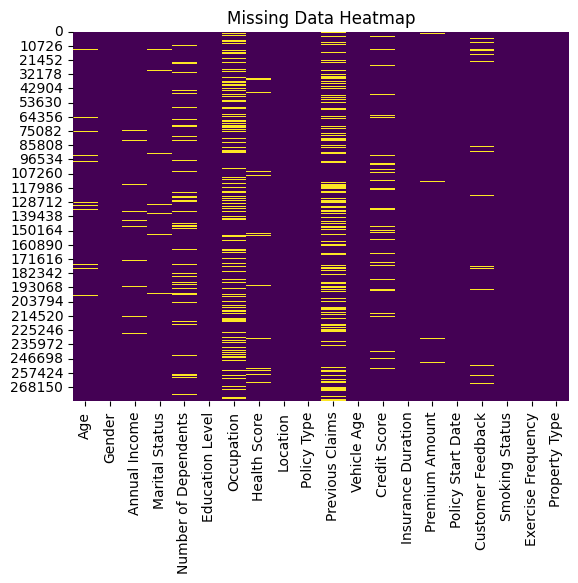

Age                      4685
Gender                      0
Annual Income           13955
Marital Status           5019
Number of Dependents    27886
Education Level             0
Occupation              81288
Health Score            10597
Location                    0
Policy Type                 0
Previous Claims         81288
Vehicle Age                 0
Credit Score            27886
Insurance Duration          0
Premium Amount           1841
Policy Start Date           0
Customer Feedback       18349
Smoking Status              0
Exercise Frequency          0
Property Type               0
dtype: int64


In [75]:
# Check for missing values

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

print(data.isnull().sum())

In [76]:
# Drop missing values
new_data = data.dropna()
print(new_data.head())

     Age  Gender  Annual Income Marital Status  Number of Dependents  \
3   60.0  Female        48371.0       Divorced                   0.0   
5   38.0    Male        31769.0        Married                   1.0   
6   56.0  Female        26209.0         Single                   1.0   
8   40.0    Male        29471.0         Single                   4.0   
11  41.0  Female        36427.0         Single                   2.0   

   Education Level     Occupation  Health Score  Location    Policy Type  \
3              PhD  Self-Employed     25.346926     Rural  Comprehensive   
5       Bachelor's       Employed     14.736611     Rural  Comprehensive   
6         Master's       Employed     33.238300     Urban        Premium   
8      High School     Unemployed     31.565248     Rural          Basic   
11     High School  Self-Employed     13.264415  Suburban        Premium   

    Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
3               1.0           11        

# Data Transform

In [77]:
print(new_data.describe())

                Age  Annual Income  Number of Dependents  Health Score  \
count  92985.000000   92985.000000          92985.000000  92985.000000   
mean      41.014121   42098.392095              2.000635     28.584177   
std       13.552250   35484.380179              1.412383     16.011769   
min       18.000000       0.000000              0.000000      0.116550   
25%       29.000000   13614.000000              1.000000     16.082971   
50%       41.000000   32138.000000              2.000000     26.448279   
75%       53.000000   62119.000000              3.000000     39.021673   
max       64.000000  149996.000000              4.000000     93.876090   

       Previous Claims   Vehicle Age  Credit Score  Insurance Duration  \
count     92985.000000  92985.000000  92985.000000        92985.000000   
mean          0.997720      9.488434    574.973544            5.013206   
std           1.000675      5.763703    158.820093            2.580619   
min           0.000000      0.000000 

## Gender
    Male - 0
    Female - 1

## Marital Status
    Single - 0
    Married - 1
    Divorced - 2

## Education Level 
    Master's - 0
    Bachelor's - 1
    PhD - 2
    High Schoold - 3

## Occupation
    Self Employed - 0
    Employed - 1
    Unemployed - 2

## Policy Type
    Comprehensive - 0
    Premium - 1
    Basic - 2

## Location 
    Urban - 0
    Suburban - 1
    Rural - 2

## Property Type
    Apartment - 0
    House - 1
    Condo - 2

## Customer Feedback
    Poor - 0
    Average - 1
    Good - 2

## Exercise Frequency
    Daily - 0
    Weekly - 1
    Monthly - 2
    Rarely - 3

## Smoking Status
    Yes - 1
    No - 0



In [ ]:
# Convert categorical features to numerical
new_data['Gender'] = new_data['Gender'].map({'Female': 1, 'Male': 0})
new_data['Marital Status'] = new_data['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
new_data['Education Level'] = new_data['Education Level'].map({'Master\'s': 0, 'Bachelor\'s': 1, 'PhD': 2, 'High School': 3})
new_data['Occupation'] = new_data['Occupation'].map({'Self-Employed': 0, 'Employed': 1, 'Unemployed': 2})
new_data['Policy Type'] = new_data['Policy Type'].map({'Comprehensive': 0, 'Premium': 1, 'Basic': 2})
new_data['Location'] = new_data['Location'].map({'Urban': 0, 'Suburban': 1, 'Rural': 2})
new_data['Property Type'] = new_data['Property Type'].map({'Apartment': 0, 'House': 1, 'Condo': 2})
new_data['Customer Feedback'] = new_data['Customer Feedback'].map({'Poor': 0, 'Average': 1, 'Good': 2})
new_data['Exercise Frequency'] = new_data['Exercise Frequency'].map({'Daily': 0, 'Weekly': 1, 'Monthly': 2, 'Rarely': 3})
new_data['Smoking Status'] = new_data['Smoking Status'].map({'Yes': 1, 'No': 0})

In [ ]:
# Change data types
# new_data.loc[:, 'Age'] = new_data['Age'].astype(int)

# Age to int
new_data['Age'] = new_data['Age'].astype(int)

# new_data.loc[:, 'Gender'] = new_data['Gender'].astype(bool)
new_data['Number of Dependents'] = new_data['Number of Dependents'].astype(int)
new_data['Previous Claims'] = new_data['Previous Claims'].astype(int)
new_data['Credit Score'] = new_data['Credit Score'].astype(int)
new_data['Premium Amount'] = new_data['Premium Amount'].astype(int)
new_data['Smoking Status'] = new_data['Smoking Status'].astype(int)
new_data['Property Type'] = new_data['Property Type'].astype(int)

# Display the first 5 rows of the new data
# print(new_data.head())
print(new_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 92985 entries, 3 to 278854
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   92985 non-null  int64  
 1   Gender                92985 non-null  int64  
 2   Annual Income         92985 non-null  float64
 3   Marital Status        92985 non-null  int64  
 4   Number of Dependents  92985 non-null  int64  
 5   Education Level       92985 non-null  int64  
 6   Occupation            92985 non-null  int64  
 7   Health Score          92985 non-null  float64
 8   Location              92985 non-null  int64  
 9   Policy Type           92985 non-null  int64  
 10  Previous Claims       92985 non-null  int64  
 11  Vehicle Age           92985 non-null  int64  
 12  Credit Score          92985 non-null  int64  
 13  Insurance Duration    92985 non-null  int64  
 14  Premium Amount        92985 non-null  int64  
 15  Policy Start Date     9

C:\Users\Guima\AppData\Local\Temp\ipykernel_2440\2458601337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Age'] = new_data['Age'].astype(int)
C:\Users\Guima\AppData\Local\Temp\ipykernel_2440\2458601337.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Number of Dependents'] = new_data['Number of Dependents'].astype(int)
C:\Users\Guima\AppData\Local\Temp\ipykernel_2440\2458601337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

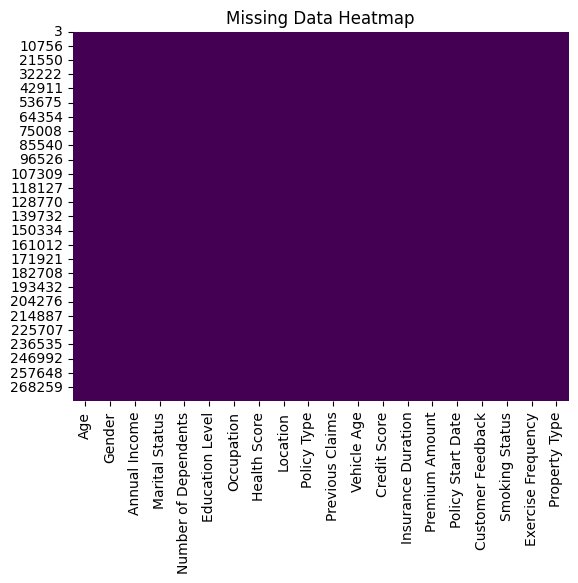

In [80]:
# Missing data heatmap
sns.heatmap(new_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

No missing data

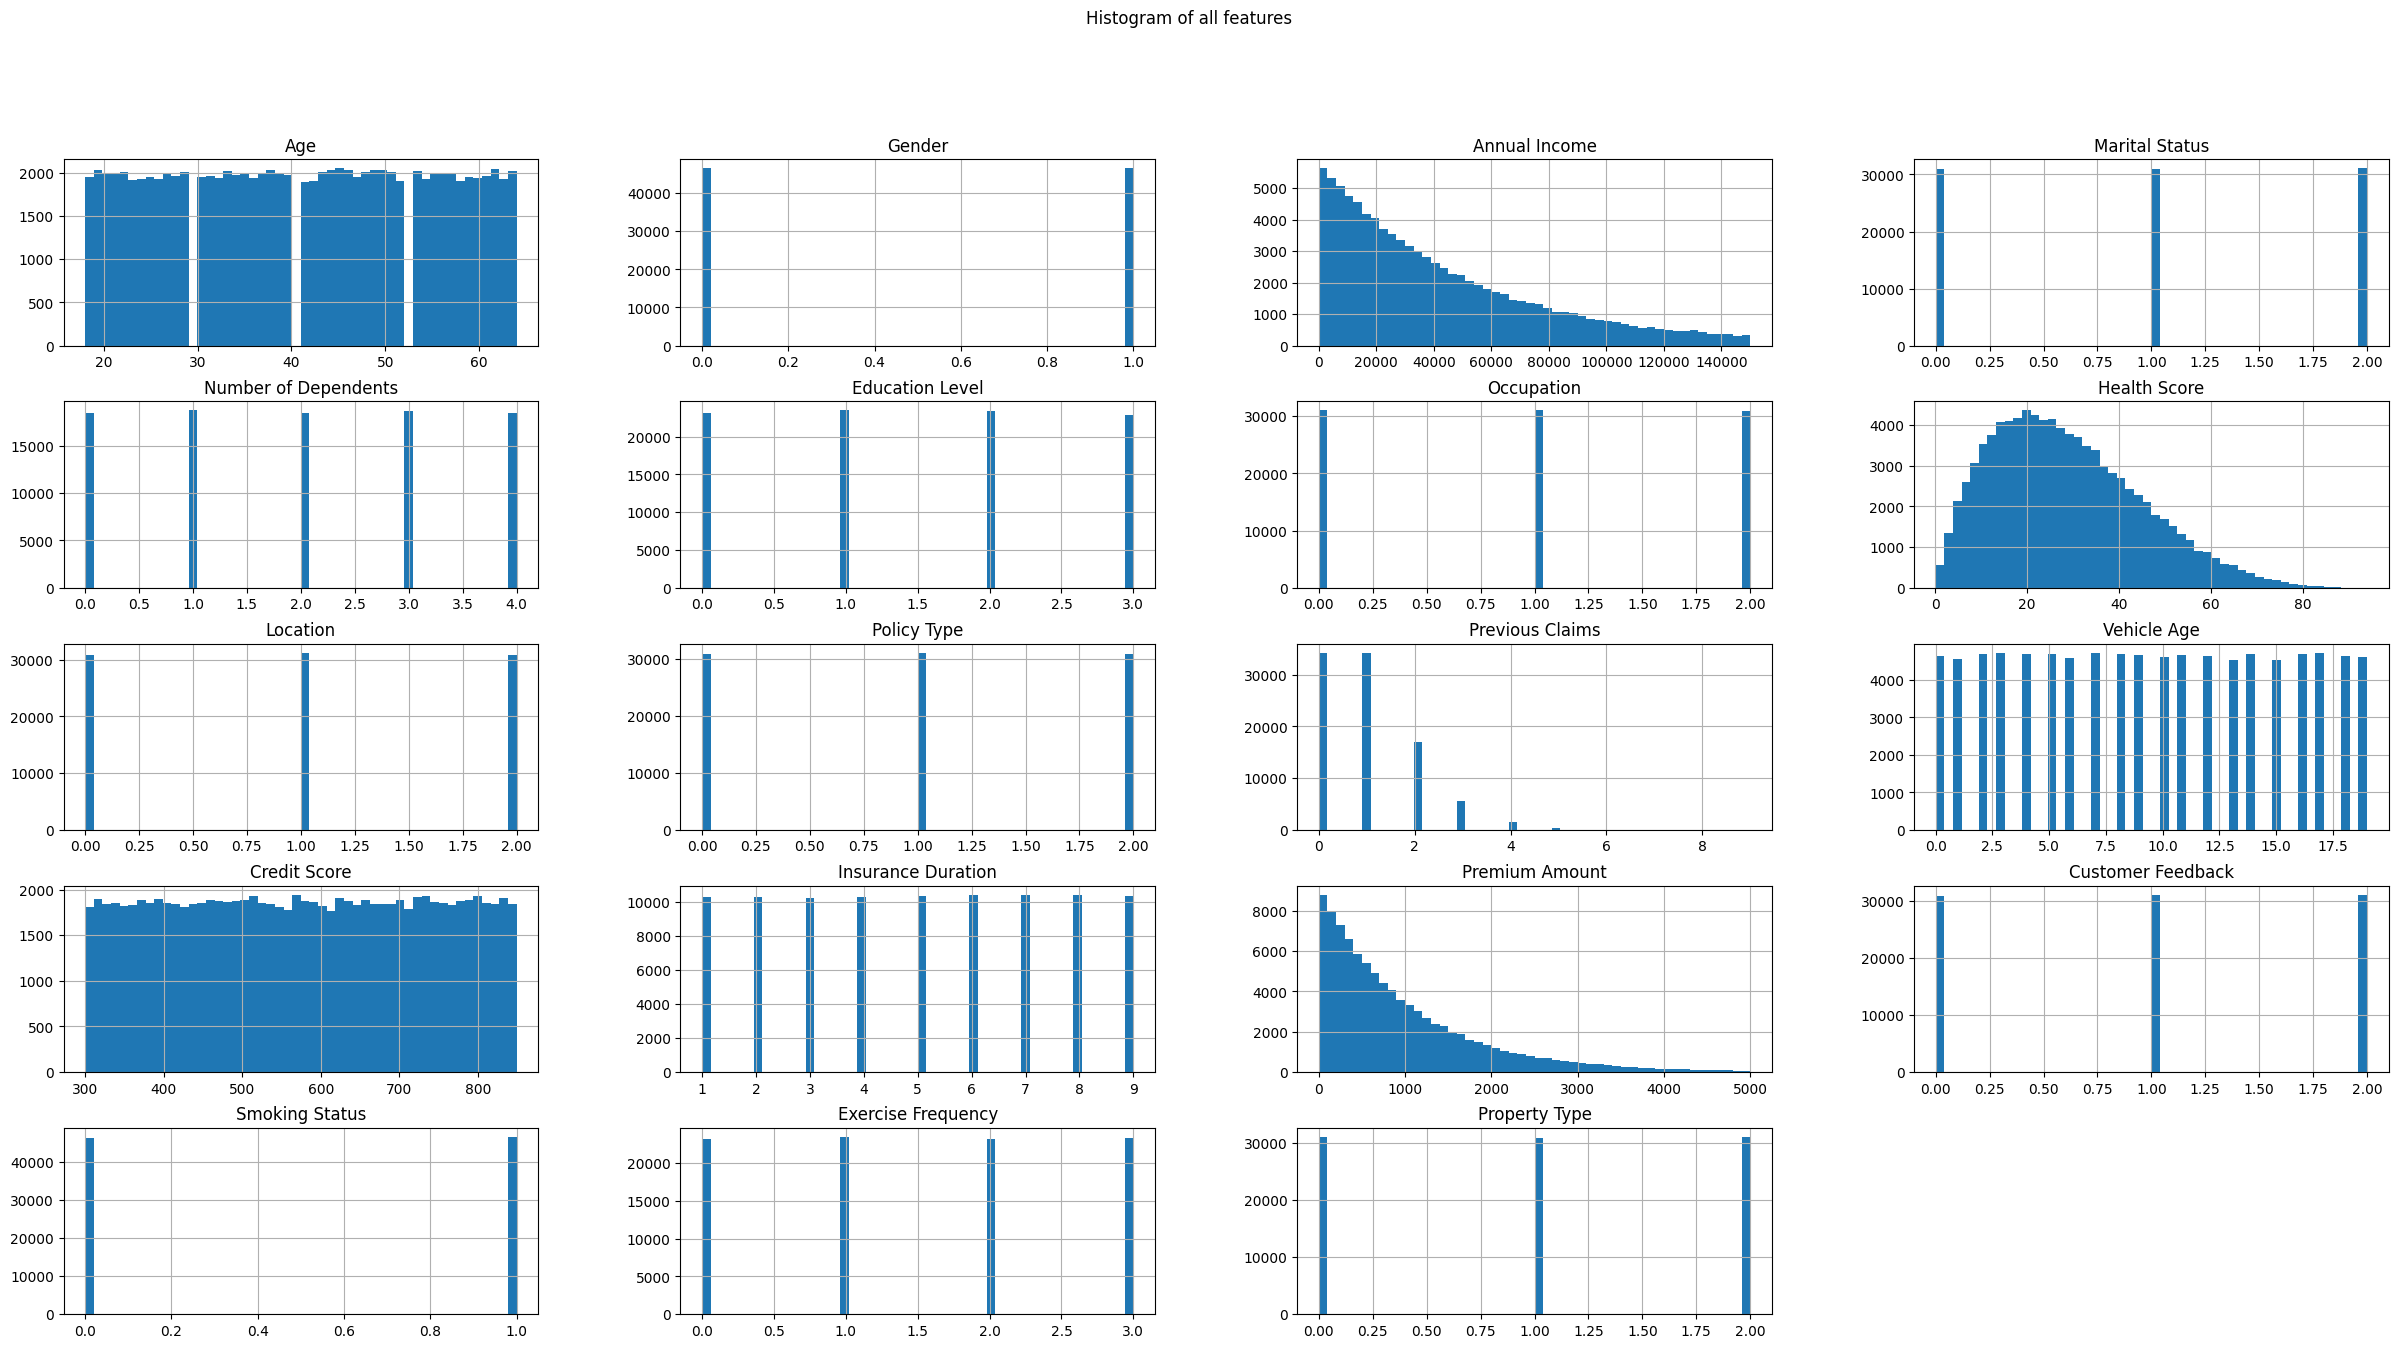

In [83]:
# Histogram of all features
new_data.hist(bins=50, figsize=(30,15))
plt.suptitle('Histogram of all features')
plt.show()

SAVE DATA

In [82]:
# Save the cleaned data
new_data.to_csv('cleaned_insurance_data.csv', index=False)